In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('tips (data for regression problem).csv')

In [ ]:
df.shape

(244, 7)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.nunique()

,0
total_bill,229
tip,123
sex,2
smoker,2
day,4
time,2
size,6


In [ ]:
# prompt: give me count of both  unique values in column 'sex'

df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


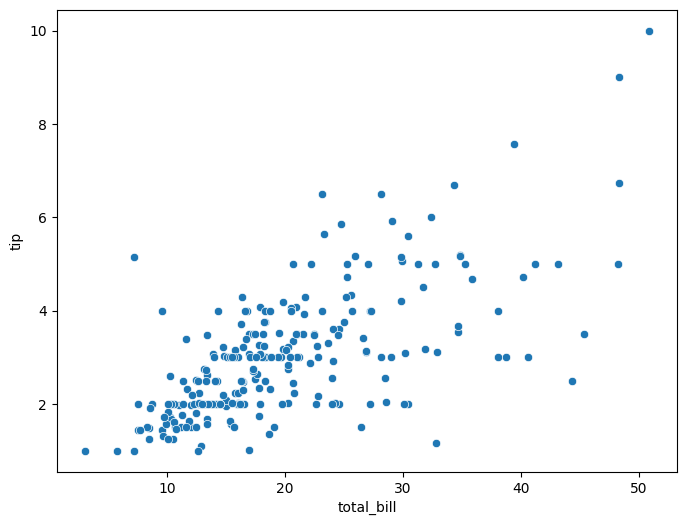

In [ ]:
# prompt: give scatter plot between columns

plt.figure(figsize=(8,6))
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

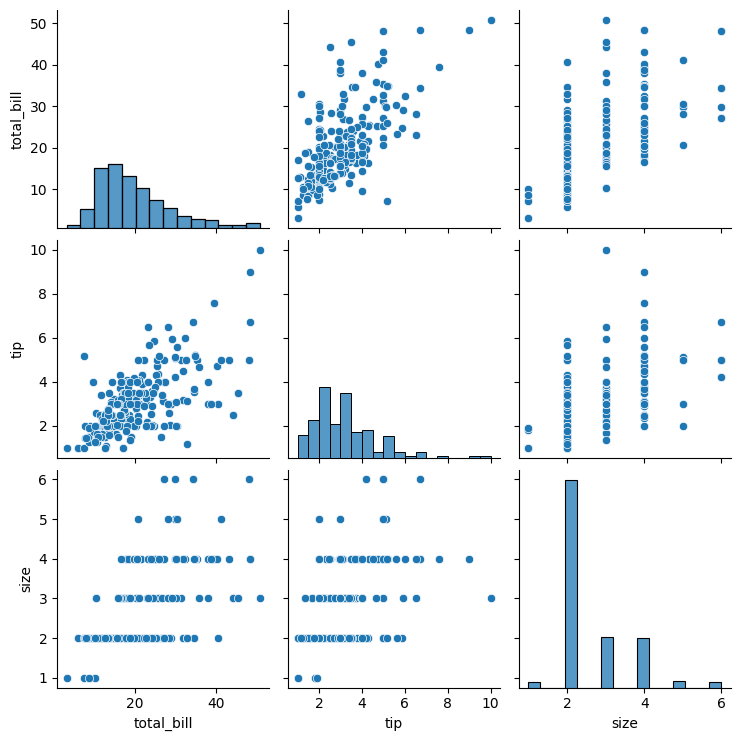

In [ ]:
# prompt: use pairplot for mjltiple features give these graphs as subplots with each having own y and x axis name

import seaborn as sns
sns.pairplot(df)
plt.show()

In [ ]:
# prompt: Statistical Tests for Linearity (Rainbow Test) give me

from statsmodels.formula.api import ols

# Fit the linear regression model
model = ols('tip ~ total_bill', data=df).fit()

# Perform the Rainbow test
from statsmodels.stats.diagnostic import linear_rainbow
rainbow_test = linear_rainbow(model)
rainbow_test

(1.2291480226129028, 0.1291192152551375)

In [ ]:
# Identify columns with two unique values
cols_to_vectorize = [col for col in df.columns if df[col].nunique() == 2]

# Create vector representations for selected columns with 1s and 0s, dropping the first column
for col in cols_to_vectorize:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)

# Display the updated dataset
print(df.head())


   total_bill   tip  day  size  sex_Male  smoker_Yes  time_Lunch
0       16.99  1.01  Sun     2         0           0           0
1       10.34  1.66  Sun     3         1           0           0
2       21.01  3.50  Sun     3         1           0           0
3       23.68  3.31  Sun     2         1           0           0
4       24.59  3.61  Sun     4         0           0           0


In [ ]:
# prompt: now do in column vectorization of day column

# Assuming 'day' column exists and has more than 2 unique values.
# If 'day' has only two unique values, it was already vectorized in the previous code.

# Check if 'day' column needs vectorization
if 'day' in df.columns and df['day'].nunique() > 2:
    day_dummies = pd.get_dummies(df['day'], prefix='day', drop_first=False).astype(int) #Keep all columns
    df = pd.concat([df, day_dummies], axis=1)
    df = df.drop('day', axis=1)

print(df.head())

   total_bill   tip  size  sex_Male  smoker_Yes  time_Lunch  day_Fri  day_Sat  \
0       16.99  1.01     2         0           0           0        0        0   
1       10.34  1.66     3         1           0           0        0        0   
2       21.01  3.50     3         1           0           0        0        0   
3       23.68  3.31     2         1           0           0        0        0   
4       24.59  3.61     4         0           0           0        0        0   

   day_Sun  day_Thur  
0        1         0  
1        1         0  
2        1         0  
3        1         0  
4        1         0  


In [ ]:
import pandas as pd
from IPython.display import display

# Set Pandas display options for a cleaner layout
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set display width to prevent line wrapping

# Display the DataFrame with improved readability
display(df.head())


,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,0,0,0,0,0,1,0
1,10.34,1.66,3,1,0,0,0,0,1,0
2,21.01,3.50,3,1,0,0,0,0,1,0
3,23.68,3.31,2,1,0,0,0,0,1,0
4,24.59,3.61,4,0,0,0,0,0,1,0



Model Performance Metrics:

Linear Regression:
R² Score: 0.4646
RMSE: 1.0104
MAE: 0.7413

Ridge:
R² Score: 0.4648
RMSE: 1.0102
MAE: 0.7410

Lasso:
R² Score: 0.4502
RMSE: 1.0238
MAE: 0.7638

Correlation with tip:
tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
sex_Male      0.088862
smoker_Yes    0.005929
day_Sat      -0.002790
day_Fri      -0.055463
day_Thur     -0.095879
time_Lunch   -0.121629
Name: tip, dtype: float64

Durbin-Watson statistic: 2.0677
Shapiro-Wilk test p-value: 0.0000


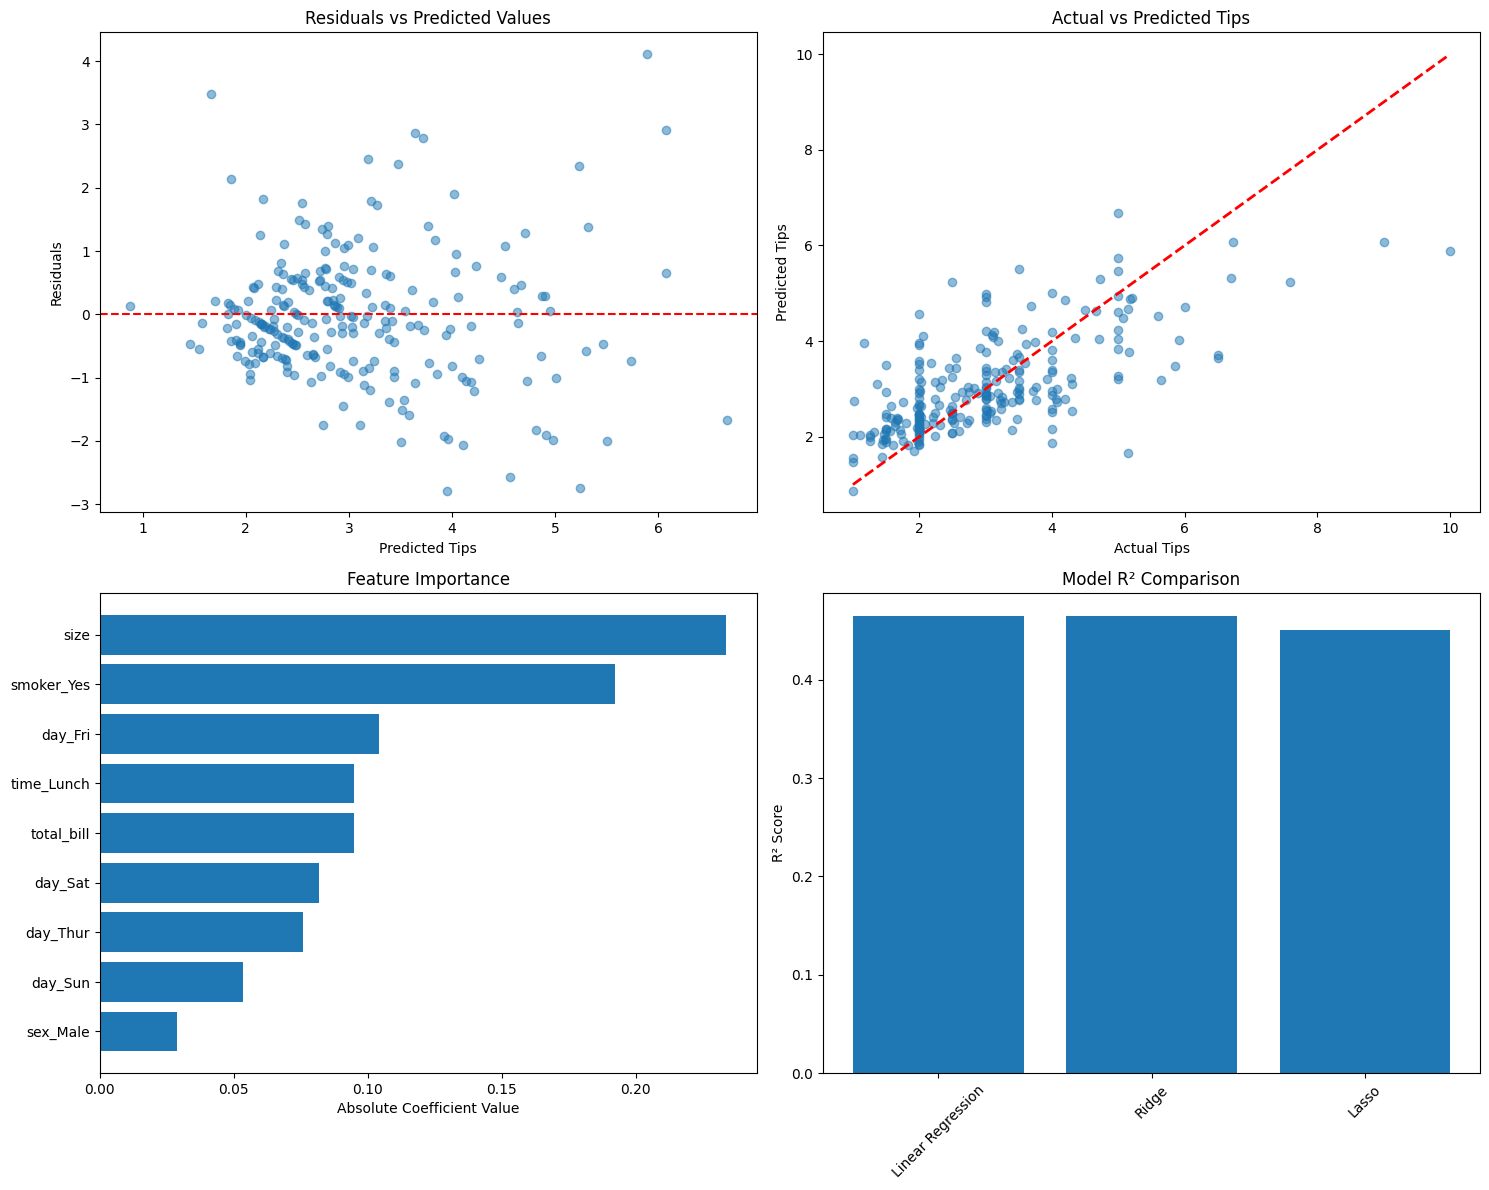

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is already vectorized and stored in df
# Separate features and target
X = df.drop(['tip'], axis=1)  # Dropping the target variable
y = df['tip']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0)
}

results = {}
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X)
    y_test_pred = model.predict(X_test)

    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'test_predictions': y_test_pred,
        'r2_score': r2_score(y, y_pred),
        'rmse': np.sqrt(mean_squared_error(y, y_pred)),
        'mae': mean_absolute_error(y, y_pred)
    }

# Create visualization subplots
plt.figure(figsize=(15, 12))

# 1. Residuals Plot for Linear Regression
plt.subplot(2, 2, 1)
residuals = y - results['Linear Regression']['predictions']
plt.scatter(results['Linear Regression']['predictions'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tips')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 2. Actual vs Predicted Values
plt.subplot(2, 2, 2)
plt.scatter(y, results['Linear Regression']['predictions'], alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips')

# 3. Feature Importance Plot
plt.subplot(2, 2, 3)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(results['Linear Regression']['model'].coef_)
})
importance = importance.sort_values('Importance', ascending=True)
plt.barh(np.arange(len(importance)), importance['Importance'])
plt.yticks(np.arange(len(importance)), importance['Feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')

# 4. Model Comparison
plt.subplot(2, 2, 4)
model_scores = [results[model]['r2_score'] for model in models.keys()]
plt.bar(models.keys(), model_scores)
plt.title('Model R² Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.tight_layout()

# Print detailed results
print("\nModel Performance Metrics:")
for name in models.keys():
    print(f"\n{name}:")
    print(f"R² Score: {results[name]['r2_score']:.4f}")
    print(f"RMSE: {results[name]['rmse']:.4f}")
    print(f"MAE: {results[name]['mae']:.4f}")

# Test for linearity using correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation with tip:")
print(correlation_matrix['tip'].sort_values(ascending=False))

# Additional statistical tests
from scipy import stats

# Durbin-Watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f"\nDurbin-Watson statistic: {dw_statistic:.4f}")

# Shapiro-Wilk test for normality of residuals
_, normality_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {normality_p_value:.4f}")

In [ ]:

display(correlation_matrix)

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,-0.183118,-0.086168,0.054919,0.122953,-0.138174
tip,0.675734,1.000000,0.489299,0.088862,0.005929,-0.121629,-0.055463,-0.002790,0.125114,-0.095879
size,0.598315,0.489299,1.000000,0.086195,-0.133178,-0.103411,-0.142184,-0.041121,0.193054,-0.072598
sex_Male,0.144877,0.088862,0.086195,1.000000,0.002816,-0.205231,-0.071060,0.053957,0.168106,-0.194445
smoker_Yes,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.054921,0.244316,0.155744,-0.181624,-0.128534
time_Lunch,-0.183118,-0.121629,-0.103411,-0.205231,-0.054921,1.000000,0.058159,-0.462709,-0.418071,0.917996
day_Fri,-0.086168,-0.055463,-0.142184,-0.071060,0.244316,0.058159,1.000000,-0.216319,-0.195451,-0.169608
day_Sat,0.054919,-0.002790,-0.041121,0.053957,0.155744,-0.462709,-0.216319,1.000000,-0.500682,-0.434480
day_Sun,0.122953,0.125114,0.193054,0.168106,-0.181624,-0.418071,-0.195451,-0.500682,1.000000,-0.392566
day_Thur,-0.138174,-0.095879,-0.072598,-0.194445,-0.128534,0.917996,-0.169608,-0.434480,-0.392566,1.000000



Detailed Model Performance Metrics:

Linear Regression:
R² Score: 0.4373
RMSE: 0.8387
MAE: 0.6671
Cross-validation R² (mean ± std): -15874859482493958156713984.0000 ± 31749718964987916313427968.0000

Ridge:
R² Score: 0.4382
RMSE: 0.8380
MAE: 0.6671
Cross-validation R² (mean ± std): 0.4217 ± 0.1341

Lasso:
R² Score: -0.1590
RMSE: 1.2036
MAE: 1.0471
Cross-validation R² (mean ± std): -0.0231 ± 0.0167

Decision Tree:
R² Score: -0.0025
RMSE: 1.1194
MAE: 0.8614
Cross-validation R² (mean ± std): 0.1690 ± 0.1512

Random Forest:
R² Score: 0.2583
RMSE: 0.9628
MAE: 0.7599
Cross-validation R² (mean ± std): 0.4002 ± 0.1192

SVR:
R² Score: 0.3856
RMSE: 0.8764
MAE: 0.6799
Cross-validation R² (mean ± std): 0.3692 ± 0.1219

KNN:
R² Score: 0.2777
RMSE: 0.9502
MAE: 0.7585
Cross-validation R² (mean ± std): 0.2664 ± 0.0926

Best performing model: Ridge

Best parameters for Ridge
{'alpha': 10.0}
Best cross-validation score: 0.4224


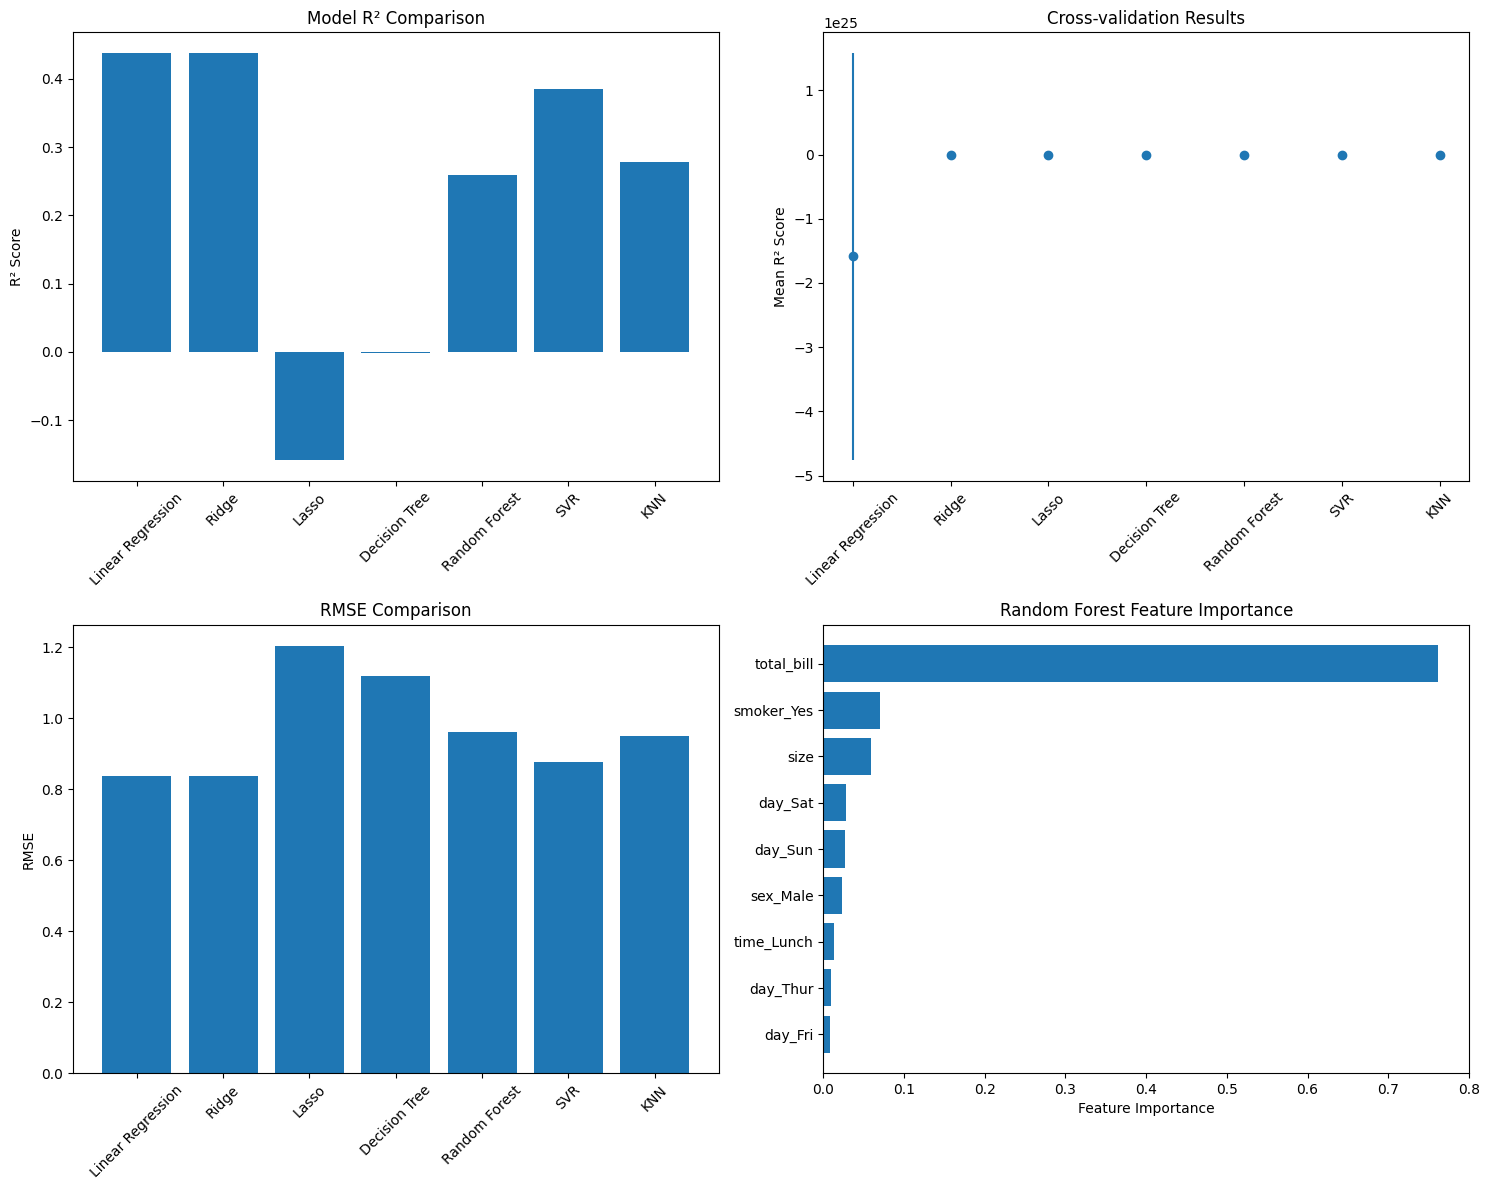

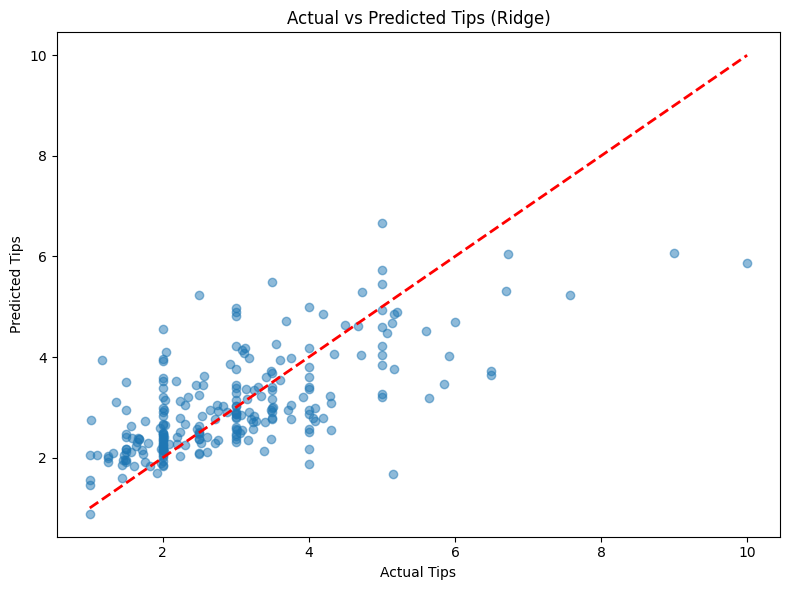

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = df.drop(['tip'], axis=1)
y = df['tip']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    results[name] = {
        'model': model,
        'r2_score': r2_score(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'cv_scores': cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    }

# Create visualizations
plt.figure(figsize=(15, 12))

# 1. Model Performance Comparison
plt.subplot(2, 2, 1)
model_scores = [results[model]['r2_score'] for model in models.keys()]
plt.bar(models.keys(), model_scores)
plt.title('Model R² Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# 2. Cross-validation Results
plt.subplot(2, 2, 2)
cv_means = [results[model]['cv_scores'].mean() for model in models.keys()]
cv_stds = [results[model]['cv_scores'].std() for model in models.keys()]
plt.errorbar(range(len(models)), cv_means, yerr=cv_stds, fmt='o')
plt.xticks(range(len(models)), models.keys(), rotation=45)
plt.title('Cross-validation Results')
plt.ylabel('Mean R² Score')

# 3. RMSE Comparison
plt.subplot(2, 2, 3)
rmse_scores = [results[model]['rmse'] for model in models.keys()]
plt.bar(models.keys(), rmse_scores)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# 4. Feature Importance (using Random Forest)
plt.subplot(2, 2, 4)
rf_model = results['Random Forest']['model']
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=True)
plt.barh(np.arange(len(importance)), importance['Importance'])
plt.yticks(np.arange(len(importance)), importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()

# Print detailed results
print("\nDetailed Model Performance Metrics:")
for name in models.keys():
    print(f"\n{name}:")
    print(f"R² Score: {results[name]['r2_score']:.4f}")
    print(f"RMSE: {results[name]['rmse']:.4f}")
    print(f"MAE: {results[name]['mae']:.4f}")
    print(f"Cross-validation R² (mean ± std): {results[name]['cv_scores'].mean():.4f} ± {results[name]['cv_scores'].std():.4f}")

# Perform hyperparameter tuning for best model
from sklearn.model_selection import GridSearchCV

# Find best performing model based on R² score
best_model_name = max(results.items(), key=lambda x: x[1]['r2_score'])[0]
print(f"\nBest performing model: {best_model_name}")

# Define parameter grids for each model type
param_grids = {
    'Linear Regression': {},  # No hyperparameters to tune
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'Decision Tree': {'max_depth': [3, 5, 7, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7, 9]}
}

# Perform grid search for best model
if best_model_name in param_grids and param_grids[best_model_name]:
    grid_search = GridSearchCV(
        models[best_model_name],
        param_grids[best_model_name],
        cv=5,
        scoring='r2'
    )
    grid_search.fit(X_scaled, y)

    print("\nBest parameters for", best_model_name)
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Save predictions for best model
best_model = results[best_model_name]['model']
final_predictions = best_model.predict(X_scaled)

# Plot actual vs predicted for best model
plt.figure(figsize=(8, 6))
plt.scatter(y, final_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title(f'Actual vs Predicted Tips ({best_model_name})')
plt.tight_layout()


***CONCLUSION***


Significant Factors Impacting Tips:

Total bill is by far the most influential factor (importance score ~0.8)
Smoking status (smoker_Yes) has a minor influence
Party size shows slight importance
Day of the week and gender have minimal impact
Time of day (lunch) shows very little influence


Prediction Accuracy Analysis:

Most Effective Models:

Ridge Regression:

Best performing model (R² = 0.4382)
Most stable cross-validation score (0.4217 ± 0.1341)
Lowest RMSE (0.8380)
Best alpha parameter = 10.0


Linear Regression:

Similar performance to Ridge (R² = 0.4373)
However, poor cross-validation stability


SVR:

Third-best performer (R² = 0.3856)
Stable cross-validation (0.3692 ± 0.1219)



Poorest Performers:

Lasso (R² = -0.1590)
Decision Tree (R² = -0.0025)

The Actual vs Predicted Tips plot shows:

Reasonable prediction accuracy for lower tip amounts
Increasing scatter for higher tip amounts
Some systematic underprediction of larger tips


Actionable Insights for Management:

Based on Feature Importance:
a) Revenue-Based Strategy:

Total bill is the strongest predictor of tips
Focus on increasing average bill size through upselling and menu optimization
Consider prix fixe menus or special combinations

b) Service Optimization:

Smoking status has some impact
Consider optimizing service allocation between smoking/non-smoking sections
Train staff to provide consistent service quality across all sections

c) Operational Insights:

Party size has moderate importance
Optimize table arrangements for different group sizes
Consider service strategies specific to different group sizes

d) Timing Considerations:

Day of week and time have minimal impact
Maintain consistent service standards throughout the week
No need for different service strategies for lunch vs. dinner

Recommendations for Implementation:

Training Focus:

Train staff on effective upselling techniques
Emphasize consistent service quality regardless of table location or time


Service Strategy:

Develop specific service protocols for different party sizes
Implement targeted upselling strategies based on bill amount ranges


Monitoring System:

Track bill size to tip ratio regularly
Monitor service quality across different sections
Implement feedback system for continuous improvement


Model Usage:

Use Ridge Regression model for tip predictions
Consider recalibrating the model periodically
Use predictions for staff scheduling and service planning